In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers # type: ignore


embedding_input_director = keras.Input(shape=(1,), dtype='int32')
embedding_input_cast = keras.Input(shape=(5,), name='embedding_input_cast', dtype='int32')
embedding_input_composer = keras.Input(shape=(1,), name='embedding_input_composer', dtype='int32')
embedding_input_writer = keras.Input(shape=(1,), name='embedding_input_writer', dtype='int32')
embedding_input_language = keras.Input(shape=(1,), name='embedding_input_language', dtype='int32')
embedding_input_country = keras.Input(shape=(1,), name='embedding_input_country', dtype='int32')
embedding_input_studio = keras.Input(shape=(1,), name='embedding_input_studio', dtype='int32')

embedding_layer_director = layers.Embedding(input_dim=1994, output_dim=4)
embedding_layer_cast = layers.Embedding(input_dim=4869, output_dim=16)
embedding_layer_composer = layers.Embedding(input_dim=401, output_dim=4)
embedding_layer_writer = layers.Embedding(input_dim=601, output_dim=4)
embedding_layer_language = layers.Embedding(input_dim=47, output_dim=4)
embedding_layer_country = layers.Embedding(input_dim=88, output_dim=4)
embedding_layer_studio = layers.Embedding(input_dim=359, output_dim=4)

embedded_director = embedding_layer_director(embedding_input_director)
embedded_cast = embedding_layer_cast(embedding_input_cast)
embedded_composer = embedding_layer_composer(embedding_input_composer)
embedded_writer = embedding_layer_writer(embedding_input_writer)
embedded_language = embedding_layer_language(embedding_input_language)
embedded_country = embedding_layer_country(embedding_input_country)
embedded_studio = embedding_layer_studio(embedding_input_studio)

embedded_director_flat = layers.Flatten()(embedded_director)
embedded_cast_flat = layers.Flatten()(embedded_cast)
embedded_composer_flat = layers.Flatten()(embedded_composer)
embedded_writer_flat = layers.Flatten()(embedded_writer)
embedded_language_flat = layers.Flatten()(embedded_language)
embedded_country_flat = layers.Flatten()(embedded_country)
embedded_studio_flat = layers.Flatten()(embedded_studio)

all_embeddings = layers.Concatenate()([
	embedded_director_flat, # 4
	embedded_cast_flat,   # 16 * 5
	embedded_composer_flat, # 4 * 1
	embedded_writer_flat, # 4 * 1 
	embedded_language_flat,# 4 * 1
	embedded_country_flat, # 4 * 1
	embedded_studio_flat # 4 * 1
])
other_features_dim = 23
other_features_input = keras.Input(shape=(other_features_dim,), name='other_features_input')

concat = layers.Concatenate()([all_embeddings, other_features_input])
num_movie_features_encoded = 64
input_dim = 4 + (16 * 5) + 4 + 4 + 4 + 4 + 4 +other_features_dim
print(input_dim)
x = layers.Dense(256, activation='relu')(concat)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoded = layers.Dense(num_movie_features_encoded, activation='relu')(x)
x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

decoded = layers.Dense(23, activation='sigmoid')(x)

autoencoder_model = keras.Model(
	inputs=[
		embedding_input_director,
		embedding_input_cast,
		embedding_input_composer,
		embedding_input_writer,
		embedding_input_language,
		embedding_input_country,
		embedding_input_studio,
		other_features_input
	],
	outputs=decoded
)

autoencoder_model.compile(
	optimizer=optimizers.Adam(learning_rate=1e-4),
	loss='mse',
	metrics=[ 'mae','cosine_similarity' ]

)
autoencoder_model.summary()

127


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_input_ca… │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_input_co… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_input_wr… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_input_la… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_input_co… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_input_st… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_32        │ (None, 1, 4)      │      7,976 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_33        │ (None, 5, 16)     │     77,904 │ embedding_input_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_34        │ (None, 1, 4)      │      1,604 │ embedding_input_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_35        │ (None, 1, 4)      │      2,404 │ embedding_input_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_36        │ (None, 1, 4)      │        188 │ embedding_input_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_37        │ (None, 1, 4)      │        352 │ embedding_input_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_38        │ (None, 1, 4)      │      1,436 │ embedding_input_… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_32          │ (None, 4)         │          0 │ embedding_32[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_33          │ (None, 80)        │          0 │ embedding_33[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_34          │ (None, 4)         │          0 │ embedding_34[0][

 Total params: 221,359 (864.68 KB)

 Trainable params: 221,359 (864.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping 
movies_df = pd.read_csv('data/Final_Movie_Data.csv')
embedding_features = [
	movies_df['director_id'].astype(int).values,
	movies_df[['actor_1_id', 'actor_2_id', 'actor_3_id', 'actor_4_id', 'actor_5_id']].astype(int).values,
	movies_df['composer_id'].astype(int).values,
	movies_df['writer_id'].astype(int).values,
	movies_df['language_id'].astype(int).values,
	movies_df['country_1_id'].astype(int).values,
	movies_df['studio_id'].astype(int).values
]

other_features_cols = [
	'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
	'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science_Fiction', 'Thriller', 'War', 'Western',
	'year', 'duration', 'average_rating', 'rating_std'
]
other_features = movies_df[other_features_cols].values
X = other_features


In [30]:

history = autoencoder_model.fit(
	[
		movies_df['director_id'].astype(int).values.reshape(-1, 1),
		movies_df[['actor_1_id', 'actor_2_id', 'actor_3_id', 'actor_4_id', 'actor_5_id']].astype(int).values,
		movies_df['composer_id'].astype(int).values.reshape(-1, 1),
		movies_df['writer_id'].astype(int).values.reshape(-1, 1),
		movies_df['language_id'].astype(int).values.reshape(-1, 1),
		movies_df['country_1_id'].astype(int).values.reshape(-1, 1),
		movies_df['studio_id'].astype(int).values.reshape(-1, 1),
		X
	],
	X,
	epochs=100,
	batch_size=32,
	validation_split=0.1,
	callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
	verbose=1
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - cosine_similarity: 0.4991 - loss: 0.2230 - mae: 0.4628 - val_cosine_similarity: 0.5041 - val_loss: 0.2180 - val_mae: 0.4580
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - cosine_similarity: 0.5057 - loss: 0.2141 - mae: 0.4532 - val_cosine_similarity: 0.5257 - val_loss: 0.1953 - val_mae: 0.4321
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - cosine_similarity: 0.5383 - loss: 0.1846 - mae: 0.4168 - val_cosine_similarity: 0.6142 - val_loss: 0.1351 - val_mae: 0.3397
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.6317 - loss: 0.1258 - mae: 0.3085 - val_cosine_similarity: 0.7404 - val_loss: 0.0912 - val_mae: 0.2064
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.7095 - loss: 0.1009 - mae: 0.2080 - val_cosine_similarity: 0.7671 - val_loss: 0.0839 - val_mae: 0.1844
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - cosine_similarity: 0.7335 - loss: 0.0929 - mae: 0.1973 - val_

In [ ]:
sample_index = 1
sample_embedding_inputs = [
	movies_df['director_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df[['actor_1_id', 'actor_2_id', 'actor_3_id', 'actor_4_id', 'actor_5_id']].astype(int).values[sample_index].reshape(1, 5),
	movies_df['composer_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['writer_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['language_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['country_1_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['studio_id'].astype(int).values[sample_index].reshape(1, 1),
	X[sample_index].reshape(1, -1)
]
sample_input = X[sample_index].reshape(1, -1)
reconstructed_output = autoencoder_model.predict(sample_embedding_inputs)

print("Input (original scale):", sample_input)

print("Reconstructed Output (original scale):", reconstructed_output)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Input (original scale): [[1.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.90384615 0.17105263 0.44444444 0.67354763]]
Reconstructed Output (original scale): [[9.9999785e-01 9.9999934e-01 9.6302589e-05 1.0524194e-12 5.0405652e-06
  1.4204606e-05 2.4672651e-12 3.1549465e-07 2.5463370e-08 4.8805628e-05
  9.5882228e-07 1.5627802e-05 8.2228863e-13 3.2524396e-11 8.1849561e-13
  9.9997592e-01 1.6717939e-03 7.2099743e-07 1.9904330e-12 9.1111350e-01
  1.7998981e-01 4.4506323e-01 8.7430584e-01]]


In [ ]:
movie_encoder_model = keras.Model(
	inputs=autoencoder_model.input,
	outputs=encoded
)

encoded_movies = movie_encoder_model.predict([
	movies_df['director_id'].astype(int).values.reshape(-1, 1),
	movies_df[['actor_1_id', 'actor_2_id', 'actor_3_id', 'actor_4_id', 'actor_5_id']].astype(int).values,
	movies_df['composer_id'].astype(int).values.reshape(-1, 1),
	movies_df['writer_id'].astype(int).values.reshape(-1, 1),
	movies_df['language_id'].astype(int).values.reshape(-1, 1),
	movies_df['country_1_id'].astype(int).values.reshape(-1, 1),
	movies_df['studio_id'].astype(int).values.reshape(-1, 1),
	movies_df[other_features_cols].values
])
print("Encoded movies shape:", encoded_movies.shape)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Encoded movies shape: (805, 64)


In [33]:
autoencoder_model.save('saved_models/movie_autoencoder.keras')
movie_encoder_model.save('saved_models/movie_encoder.keras')

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers 

movie_encoder_model = keras.models.load_model('saved_models/movie_encoder.keras')

sample_embedding_inputs = [
	movies_df['director_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df[['actor_1_id', 'actor_2_id', 'actor_3_id', 'actor_4_id', 'actor_5_id']].astype(int).values[sample_index].reshape(1, 5),
	movies_df['composer_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['writer_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['language_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['country_1_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df['studio_id'].astype(int).values[sample_index].reshape(1, 1),
	movies_df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
			   'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science_Fiction', 'Thriller', 'War', 'Western',
			   'year', 'duration', 'average_rating', 'rating_std']].values[sample_index].reshape(1, -1)
]

# Get the encoded result
encoded_result = movie_encoder_model.predict(sample_embedding_inputs)
print("Encoded result:", encoded_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Encoded result: [[ 0.          8.299406    0.          3.1427054   1.8930837   4.226106
   0.          6.131261    0.          7.3832383   0.          1.8071904
   6.2158422   4.142524    0.          0.          1.3659812   0.
   0.          4.4328213   0.          1.0571768   7.644551    0.
   0.          0.          1.3014848   4.2397394   0.          5.498116
   0.          4.282928    1.5880035   4.5116014   3.3406034   5.3887215
   0.          4.2241364   4.535889    0.          0.8147072   5.7566676
  11.244999    0.          6.2520723   0.25300658  9.929212    1.6355951
   0.          1.5596317   6.3676133   3.32039     5.8239355   0.83932287
   7.776976    1.2469355   2.2358818   0.          0.8678414   2.2085514
   0.          6.7172213   3.1722088   6.4131293 ]]


In [ ]:
import pandas as pd
import numpy as np
movies_df = pd.read_csv('data/Final_Movie_Data.csv')


encoded_movies = movie_encoder_model.predict([
    movies_df['director_id'].astype(int).values.reshape(-1, 1),
    movies_df[['actor_1_id', 'actor_2_id', 'actor_3_id', 'actor_4_id', 'actor_5_id']].astype(int).values,
    movies_df['composer_id'].astype(int).values.reshape(-1, 1),
    movies_df['writer_id'].astype(int).values.reshape(-1, 1),
    movies_df['language_id'].astype(int).values.reshape(-1, 1),
    movies_df['country_1_id'].astype(int).values.reshape(-1, 1),
    movies_df['studio_id'].astype(int).values.reshape(-1, 1),
	movies_df[other_features_cols].values
])

print("Encoded movies shape:", encoded_movies.shape)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Encoded movies shape: (805, 64)


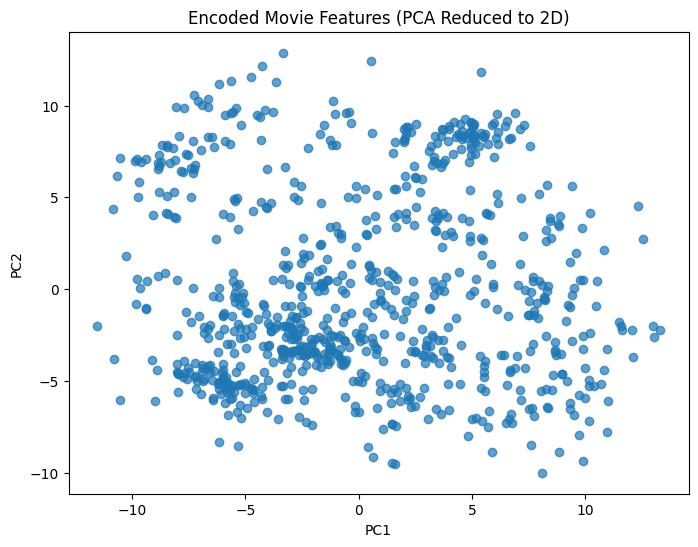

5 Nearest Neighbors for movie index 1
Neighbor 1: Movie index 1, Distance: 0.0000
Movie title (if available): {'movie_id': 2.0, 'Action': 1.0, 'Adventure': 1.0, 'Animation': 0.0, 'Biography': 0.0, 'Comedy': 0.0, 'Crime': 0.0, 'Documentary': 0.0, 'Drama': 0.0, 'Family': 0.0, 'Fantasy': 0.0, 'History': 0.0, 'Horror': 0.0, 'Music': 0.0, 'Mystery': 0.0, 'Romance': 0.0, 'Science_Fiction': 1.0, 'Thriller': 0.0, 'War': 0.0, 'Western': 0.0, 'year': 0.9038461538461532, 'duration': 0.1710526315789473, 'average_rating': 0.4444444444444444, 'director_id': 1892.0, 'writer_id': 2.0, 'composer_id': 2.0, 'studio_id': 2.0, 'actor_1_id': 427.0, 'actor_2_id': 2088.0, 'actor_3_id': 3638.0, 'actor_4_id': 3653.0, 'actor_5_id': 4752.0, 'language_id': 13.0, 'country_1_id': 17.0, 'rating_std': 0.6735476330996641}
Neighbor 2: Movie index 315, Distance: 0.1678
Movie title (if available): {'movie_id': 316.0, 'Action': 1.0, 'Adventure': 1.0, 'Animation': 0.0, 'Biography': 0.0, 'Comedy': 0.0, 'Crime': 0.0, 'Documen

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

encoded_movies_flat = encoded_movies.reshape(encoded_movies.shape[0], -1)
pca_movies = PCA(n_components=2)
encoded_movies_2d = pca_movies.fit_transform(encoded_movies_flat)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_movies_2d[:, 0], encoded_movies_2d[:, 1], alpha=0.7)
plt.title("Encoded Movie Features (PCA Reduced to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

knn_movies = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_movies.fit(encoded_movies_2d)

movie_idx = 1
distances_movies, indices_movies = knn_movies.kneighbors([encoded_movies_2d[movie_idx]])

print(f"5 Nearest Neighbors for movie index {movie_idx}")
for i, (idx, dist) in enumerate(zip(indices_movies[0], distances_movies[0])):
	print(f"Neighbor {i+1}: Movie index {idx}, Distance: {dist:.4f}")
	if idx < len(movies_df):
		print("Movie title (if available):", movies_df.iloc[idx].to_dict())
movie_idx_1 = 461
movie_idx_2 = 597
distance_1_2 = np.linalg.norm(encoded_movies_2d[movie_idx_1] - encoded_movies_2d[movie_idx_2])
print(f"Distance between movie index {movie_idx_1} and {movie_idx_2},: {distance_1_2:.6f}",movies_df.iloc[200].to_dict())


In [ ]:
all_features_df = pd.read_csv('data_pivot/ALL_features_merged.csv')

def split_cols(prefix):
	watch = [col for col in all_features_df.columns if col.startswith(prefix) and 'count' in col and 'norm' not in col and 'rate' not in col]
	rating = [col for col in all_features_df.columns if col.startswith(prefix) and 'rate' in col and 'norm' not in col and '_count' not in col]
	norm_rate = [col for col in all_features_df.columns if col.startswith(prefix) and 'norm' in col and 'rate' in col]
	norm_count = [col for col in all_features_df.columns if col.startswith(prefix) and 'norm' in col and '_count' in col]
	return watch, rating, norm_rate, norm_count

cast_watch_id, cast_rating_id, cast_norm_rate, cast_norm_count = split_cols('cast')
country_watch_id, country_rating_id, country_norm_rate, country_norm_count = split_cols('country')
director_watch_id, director_rating_id, director_norm_rate, director_norm_count = split_cols('director')
lang_watch_id, lang_rating_id, lang_norm_rate, lang_norm_count = split_cols('lang')
decade_watch_id, decade_rating_id, decade_norm_rate, decade_norm_count = split_cols('decade')


print("cast_watch_id:", cast_watch_id)
print("cast_rating_id:", cast_rating_id)
print("cast_norm_rate:", cast_norm_rate)
print("cast_norm_count:", cast_norm_count)

print("country_watch_id:", country_watch_id)
print("country_rating_if:", country_rating_id)
print("country_norm_rate:", country_norm_rate)
print("country_norm_count:", country_norm_count)

print("director_watch_id:", director_watch_id)
print("director_rating_id:", director_rating_id)
print("director_norm_rate:", director_norm_rate)
print("director_norm_count:", director_norm_count)

print("lang_watch_id:", lang_watch_id)
print("lang_rating_id:", lang_rating_id)
print("lang_norm_rate:", lang_norm_rate)
print("lang_norm_count:", lang_norm_count)

print("decade_watch_id:", decade_watch_id)
print("decade_rating_id:", decade_rating_id)
print("decade_norm_rate:", decade_norm_rate)
print("decade_norm_count:", decade_norm_count)


cast_watch_id: ['cast1_count', 'cast2_count', 'cast3_count', 'cast4_count', 'cast5_count', 'cast6_count', 'cast7_count', 'cast8_count', 'cast9_count', 'cast10_count']
cast_rating_id: ['cast1_rate', 'cast2_rate', 'cast3_rate', 'cast4_rate', 'cast5_rate', 'cast6_rate', 'cast7_rate', 'cast8_rate', 'cast9_rate', 'cast10_rate']
cast_norm_rate: ['cast1_norm_rate', 'cast2_norm_rate', 'cast3_norm_rate', 'cast4_norm_rate', 'cast5_norm_rate', 'cast6_norm_rate', 'cast7_norm_rate', 'cast8_norm_rate', 'cast9_norm_rate', 'cast10_norm_rate']
cast_norm_count: ['cast1_norm_count', 'cast2_norm_count', 'cast3_norm_count', 'cast4_norm_count', 'cast5_norm_count', 'cast6_norm_count', 'cast7_norm_count', 'cast8_norm_count', 'cast9_norm_count', 'cast10_norm_count']
country_watch_id: ['country1_count', 'country2_count', 'country3_count', 'country4_count', 'country5_count', 'country6_count', 'country7_count', 'country8_count', 'country9_count', 'country10_count']
country_rating_if: ['country1_rate', 'country2_r

In [38]:
director_count_id_input = keras.Input(shape=(len(director_watch_id),), name='director_watch_input', dtype='int32')
director_count_id_embedding = layers.Embedding(input_dim=all_features_df[director_watch_id].max().max() + 1, output_dim=4)(director_count_id_input)
director_count_input = keras.Input(shape=(len(director_watch_id),), name='director_count_input', dtype='float32')
director_norm_count_expanded = layers.Reshape((len(director_watch_id), 1))(director_count_input)
director_count_weighted_embedding = layers.Multiply()([director_count_id_embedding, director_norm_count_expanded])
director_count_embedded = layers.Flatten()(director_count_weighted_embedding)

director_rating_input = keras.Input(shape=(len(director_rating_id),), name='director_rating_input', dtype='int32')
director_rating_embedding = layers.Embedding(input_dim=all_features_df[director_rating_id].max().max() + 1, output_dim=4)(director_rating_input)
director_rating_count_input = keras.Input(shape=(len(director_rating_id),), name='director_rating_count_input', dtype='float32')
director_norm_rating_expanded = layers.Reshape((len(director_rating_id), 1))(director_rating_count_input)
director_rating_weighted_embedding = layers.Multiply()([director_rating_embedding, director_norm_rating_expanded])
director_rating_embedded = layers.Flatten()(director_rating_weighted_embedding)
# Cast
cast_watch_input = keras.Input(shape=(len(cast_watch_id),), name='cast_watch_input', dtype='int32')
cast_watch_embedding = layers.Embedding(input_dim=all_features_df[cast_watch_id].max().max() + 1, output_dim=16)(cast_watch_input)
cast_count_input = keras.Input(shape=(len(cast_watch_id),), name='cast_count_input', dtype='float32')
cast_norm_count_expanded = layers.Reshape((len(cast_watch_id), 1))(cast_count_input)
cast_watch_weighted_embedding = layers.Multiply()([cast_watch_embedding, cast_norm_count_expanded])
cast_watch_embedded = layers.Flatten()(cast_watch_weighted_embedding)

cast_rating_input = keras.Input(shape=(len(cast_rating_id),), name='cast_rating_input', dtype='int32')
cast_rating_embedding = layers.Embedding(input_dim=all_features_df[cast_rating_id].max().max() + 1, output_dim=16)(cast_rating_input)
cast_rating_count_input = keras.Input(shape=(len(cast_rating_id),), name='cast_rating_count_input', dtype='float32')
cast_norm_rating_expanded = layers.Reshape((len(cast_rating_id), 1))(cast_rating_count_input)
cast_rating_weighted_embedding = layers.Multiply()([cast_rating_embedding, cast_norm_rating_expanded])
cast_rating_embedded = layers.Flatten()(cast_rating_weighted_embedding)

# Country
country_watch_input = keras.Input(shape=(len(country_watch_id),), name='country_watch_input', dtype='int32')
country_watch_embedding = layers.Embedding(input_dim=all_features_df[country_watch_id].max().max() + 1, output_dim=4)(country_watch_input)
country_count_input = keras.Input(shape=(len(country_watch_id),), name='country_count_input', dtype='float32')
country_norm_count_expanded = layers.Reshape((len(country_watch_id), 1))(country_count_input)
country_watch_weighted_embedding = layers.Multiply()([country_watch_embedding, country_norm_count_expanded])
country_watch_embedded = layers.Flatten()(country_watch_weighted_embedding)

country_rating_input = keras.Input(shape=(len(country_rating_id),), name='country_rating_input', dtype='int32')
country_rating_embedding = layers.Embedding(input_dim=all_features_df[country_rating_id].max().max() + 1, output_dim=4)(country_rating_input)
country_rating_count_input = keras.Input(shape=(len(country_rating_id),), name='country_rating_count_input', dtype='float32')
country_norm_rating_expanded = layers.Reshape((len(country_rating_id), 1))(country_rating_count_input)
country_rating_weighted_embedding = layers.Multiply()([country_rating_embedding, country_norm_rating_expanded])
country_rating_embedded = layers.Flatten()(country_rating_weighted_embedding)

# Language
language_watch_input = keras.Input(shape=(len(lang_watch_id),), name='language_watch_input', dtype='int32')
language_watch_embedding = layers.Embedding(input_dim=all_features_df[lang_watch_id].max().max() + 1, output_dim=4)(language_watch_input)
language_count_input = keras.Input(shape=(len(lang_watch_id),), name='language_count_input', dtype='float32')
language_norm_count_expanded = layers.Reshape((len(lang_watch_id), 1))(language_count_input)
language_watch_weighted_embedding = layers.Multiply()([language_watch_embedding, language_norm_count_expanded])
language_watch_embedded = layers.Flatten()(language_watch_weighted_embedding)

language_rating_input = keras.Input(shape=(len(lang_rating_id),), name='language_rating_input', dtype='int32')
language_rating_embedding = layers.Embedding(input_dim=all_features_df[lang_rating_id].max().max() + 1, output_dim=4)(language_rating_input)
language_rating_count_input = keras.Input(shape=(len(lang_rating_id),), name='language_rating_count_input', dtype='float32')
language_norm_rating_expanded = layers.Reshape((len(lang_rating_id), 1))(language_rating_count_input)
language_rating_weighted_embedding = layers.Multiply()([language_rating_embedding, language_norm_rating_expanded])
language_rating_embedded	 = layers.Flatten()(language_rating_weighted_embedding)


# Decade (if you want to add, follow the same pattern)
decade_watch_input = keras.Input(shape=(len(decade_watch_id),), name='decade_watch_input', dtype='int32')
decade_watch_embedding = layers.Embedding(input_dim=all_features_df[decade_watch_id].max().max() + 1, output_dim=4)(decade_watch_input)
decade_count_input = keras.Input(shape=(len(decade_watch_id),), name='decade_count_input', dtype='float32')
decade_norm_count_expanded = layers.Reshape((len(decade_watch_id), 1))(decade_count_input)
decade_watch_weighted_embedding = layers.Multiply()([decade_watch_embedding, decade_norm_count_expanded])
decade_watch_embedded = layers.Flatten()(decade_watch_weighted_embedding)

decade_rating_input = keras.Input(shape=(len(decade_rating_id),), name='decade_rating_input', dtype='int32')
decade_rating_embedding = layers.Embedding(input_dim=all_features_df[decade_rating_id].max().max() + 1, output_dim=4)(decade_rating_input)
decade_rating_count_input = keras.Input(shape=(len(decade_rating_id),), name='decade_rating_count_input', dtype='float32')
decade_norm_rating_expanded = layers.Reshape((len(decade_rating_id), 1))(decade_rating_count_input)
decade_rating_weighted_embedding = layers.Multiply()([decade_rating_embedding, decade_norm_rating_expanded])
decade_rating_embedded = layers.Flatten()(decade_rating_weighted_embedding)

# Genre embedding
genre_input = keras.Input(shape=(1,), name='genre_input', dtype='int32')
genre_embedding = layers.Embedding(input_dim=all_features_df['genre_id'].max() + 1, output_dim=4)(genre_input)
genre_embedded = layers.Flatten()(genre_embedding)


X = np.concatenate([
	all_features_df[cast_norm_count].values,
	all_features_df[cast_norm_rate].values,
	all_features_df[country_norm_count].values,
	all_features_df[country_norm_rate].values,
	all_features_df[lang_norm_count].values,
	all_features_df[lang_norm_rate].values,
	all_features_df[director_norm_count].values,
	all_features_df[decade_norm_count].values,
	all_features_df[decade_norm_rate].values
], axis=1)

all_user_embeddings = layers.Concatenate()([
	cast_watch_embedded,
	cast_rating_embedded,
	country_watch_embedded,
	country_rating_embedded,
	language_watch_embedded,
	language_rating_embedded,
	director_count_embedded,
	director_rating_embedded,
	decade_watch_embedded,
	decade_rating_embedded,
	genre_embedded
])

num_user_features_encoded = 64
# Encoder
user_x = layers.Dense(128, activation='tanh')(all_user_embeddings)
# user_x = layers.Dense(256, activation='relu')(user_x)
user_x = layers.Dense(64, activation='tanh')(user_x)
user_x = layers.Dense(64, activation='tanh')(user_x)
user_encoded = layers.Dense(num_user_features_encoded, activation='tanh')(user_x)

# Decoder
user_x = layers.Dense(64, activation='tanh')(user_encoded)
user_x = layers.Dense(64, activation='tanh')(user_x)
user_x = layers.Dense(128, activation='tanh')(user_x)
user_decoded = layers.Dense(X.shape[1], activation='sigmoid')(user_x)

autoencoder_model = keras.Model(
	inputs=[
		cast_watch_input,
		cast_count_input,
		cast_rating_input,
		cast_rating_count_input,
		country_watch_input,
		country_count_input,
		country_rating_input,
		country_rating_count_input,
		language_watch_input,
		language_count_input,
		language_rating_input,
		language_rating_count_input,
		director_count_id_input,
		director_count_input,
		director_rating_input,
		director_rating_count_input,
		decade_watch_input,
		decade_count_input,
		decade_rating_input,
		decade_rating_count_input,
		genre_input
	],
	outputs=user_decoded
)

autoencoder_model.compile(
	optimizer=optimizers.Adam(learning_rate=1e-3),
 	loss='mse',
 	metrics=['mae','cosine_similarity'])

autoencoder_model.fit(
	[
		all_features_df[cast_watch_id].values,
		all_features_df[cast_norm_count].values,
		all_features_df[cast_rating_id].values,
		all_features_df[cast_norm_rate].values,
		all_features_df[country_watch_id].values,
		all_features_df[country_norm_count].values,
		all_features_df[country_rating_id].values,
		all_features_df[country_norm_rate].values,
		all_features_df[lang_watch_id].values,
		all_features_df[lang_norm_count].values,
		all_features_df[lang_rating_id].values,
		all_features_df[lang_norm_rate].values,
		all_features_df[director_watch_id].values,
		all_features_df[director_norm_count].values,
		all_features_df[director_rating_id].values,
		all_features_df[director_norm_rate].values,
		all_features_df[decade_watch_id].values,
		all_features_df[decade_norm_count].values,
		all_features_df[decade_rating_id].values,
		all_features_df[decade_norm_rate].values,
		all_features_df['genre_id'].values.reshape(-1, 1)
	],
	X,
	epochs=100,
	batch_size=32,
	validation_split=0.1
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - cosine_similarity: 0.5129 - loss: 0.3988 - mae: 0.3981 - val_cosine_similarity: 0.6311 - val_loss: 0.3170 - val_mae: 0.3326
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.6494 - loss: 0.3158 - mae: 0.3228 - val_cosine_similarity: 0.6432 - val_loss: 0.3108 - val_mae: 0.3248
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.6433 - loss: 0.3368 - mae: 0.3278 - val_cosine_similarity: 0.6559 - val_loss: 0.2993 - val_mae: 0.3187
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.6845 - loss: 0.2772 - mae: 0.3055 - val_cosine_similarity: 0.7054 - val_loss: 0.2458 - val_mae: 0.2884
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.7244 - loss: 0.2441 - mae: 0.2746 - val_cosine_similarity: 0.7239 - val_loss: 0.2337 - val_mae: 0.2779
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - cosine_similarity: 0.7496 - loss: 0.2317 - mae: 0.2637 - val_

In [39]:
# Create a model to output the encoded (bottleneck) representation for users
encoder_model = keras.Model(
	inputs=autoencoder_model.input,
	outputs=user_encoded
)


In [40]:
autoencoder_model.save('saved_models/user_autoencoder.keras')
encoder_model.save('saved_models/user_encoder.keras')

In [41]:
user_encoder_model = keras.models.load_model('saved_models/user_encoder.keras')


In [42]:
encoded_users = encoder_model.predict(
[
	all_features_df[cast_watch_id].values,
	all_features_df[cast_norm_count].values,
	all_features_df[cast_rating_id].values,
	all_features_df[cast_norm_rate].values,
	all_features_df[country_watch_id].values,
	all_features_df[country_norm_count].values,
	all_features_df[country_rating_id].values,
	all_features_df[country_norm_rate].values,
	all_features_df[lang_watch_id].values,
	all_features_df[lang_norm_count].values,
	all_features_df[lang_rating_id].values,
	all_features_df[lang_norm_rate].values,
	all_features_df[director_watch_id].values,
	all_features_df[director_norm_count].values,
	all_features_df[director_rating_id].values,
	all_features_df[director_norm_rate].values,
	all_features_df[decade_watch_id].values,
	all_features_df[decade_norm_count].values,
	all_features_df[decade_rating_id].values,
	all_features_df[decade_norm_rate].values,
	all_features_df['genre_id'].values.reshape(-1, 1)
])
print("Encoded users shape:", encoded_users.shape)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Encoded users shape: (827, 64)


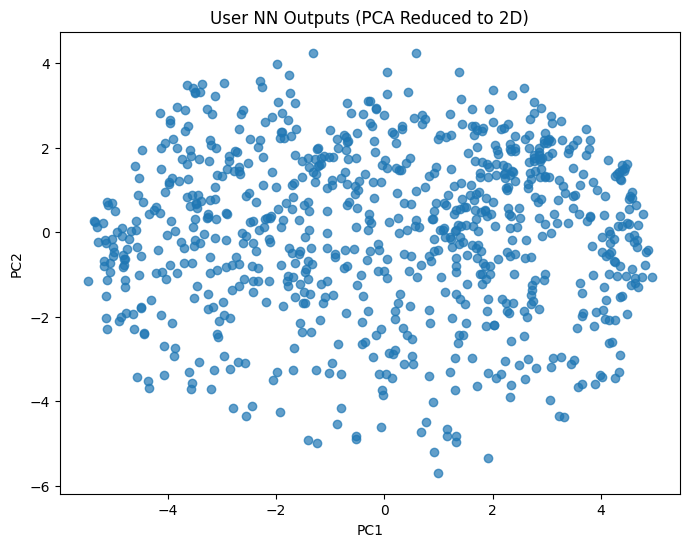

5 Nearest Neighbors for user index 0
Neighbor 1: User index 0, Distance: 0.0000
Encoded vector (first 5 dims): [-0.95122904  0.9370616  -0.2389551   0.73333675  0.92421526]
Raw user features (first 5 cols): {'user_id': 0.0, 'cast1_count': 79.0, 'cast2_count': 151.0, 'cast3_count': 715.0, 'cast4_count': 484.0, 'cast5_count': 294.0, 'cast6_count': 336.0, 'cast7_count': 20.0, 'cast8_count': 553.0, 'cast9_count': 433.0, 'cast10_count': 382.0, 'cast1_norm_count': 0.5412400979017405, 'cast2_norm_count': 0.5280374395231325, 'cast3_norm_count': 0.5197549647450047, 'cast4_norm_count': 0.4961705374188453, 'cast5_norm_count': 0.4630298102663769, 'cast6_norm_count': 0.4327968389580741, 'cast7_norm_count': 0.4246079694959638, 'cast8_norm_count': 0.4204070198713404, 'cast9_norm_count': 0.4117793700615791, 'cast10_norm_count': 0.3935406328849505, 'cast1_rate': 3274.0, 'cast2_rate': 2342.0, 'cast3_rate': 1043.0, 'cast4_rate': 1298.0, 'cast5_rate': 2806.0, 'cast6_rate': 2454.0, 'cast7_rate': 3166.0, 'c

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt

pca = PCA(n_components=2)
encoded_users_visualize = pca.fit_transform(encoded_users)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_users_visualize[:, 0], encoded_users_visualize[:, 1], alpha=0.7)
plt.title("User NN Outputs (PCA Reduced to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(encoded_users_visualize)

user_idx = 0
distances, indices = knn.kneighbors([encoded_users_visualize[user_idx]])

print("5 Nearest Neighbors for user index", user_idx)
for i, (idx, dist) in enumerate(zip(indices[0], distances[0])):
	print(f"Neighbor {i+1}: User index {idx}, Distance: {dist:.4f}")
	print("Encoded vector (first 5 dims):", encoded_users[idx][:5])
	if idx < len(all_features_df):
		print("Raw user features (first 5 cols):", all_features_df.iloc[idx, :].to_dict())
user_to_show = 1
movies_to_show = [401, 139, 2, 3, 4]


In [ ]:

ratings_df = pd.read_csv("data/Movies_ratings_df.csv")
ratings_df = ratings_df.sample(frac=1, random_state=42).reset_index(drop=True)

user_features = []
movie_features = []

movies_id_list = movies_df['movie_id'].tolist()
users_id_list = all_features_df['user_id'].tolist()
for index, row in ratings_df.iterrows():
    movie_id = row['movie_id']
    user_id = row['user_id']
    movie_idx = movies_id_list.index(movie_id)
    user_idx = users_id_list.index(user_id)
    user_features.append(encoded_users[user_idx])
    movie_features.append(encoded_movies[movie_idx])
    
user_features = np.array(user_features)
movie_features = np.array(movie_features)

ratings = ratings_df['rating'].values.astype(np.float32)

In [45]:
from sklearn.model_selection import train_test_split

user_train, user_temp, movie_train, movie_temp, y_train, y_temp = train_test_split(
    user_features, movie_features, ratings, test_size=0.3, random_state=42
)

user_val, user_test, movie_val, movie_test, y_val, y_test = train_test_split(
    user_temp, movie_temp, y_temp, test_size=0.5, random_state=42
)

In [46]:
print(user_train[0])
print(movie_train[0])
print(ratings[0])

[-0.74304557  0.92859054 -0.21429393  0.085923    0.9563475  -0.9170744
 -0.3003402  -0.79793435  0.76340526  0.19921039 -0.8694934  -0.6908095
  0.89645666 -0.58818144  0.56459504 -0.7956192  -0.1086321  -0.9933293
 -0.9875449  -0.96894115  0.3846539  -0.050558   -0.5792621   0.26466724
 -0.37803683  0.71571666  0.10379864  0.7015573   0.8334855  -0.9634866
 -0.916102    0.17424996 -0.9697789  -0.855002   -0.8619007   0.8529997
  0.01788337 -0.30832493  0.4634467   0.31493735 -0.22193886  0.53473294
  0.26450866  0.9819208  -0.9751032  -0.6623487   0.0431196   0.5297262
  0.8381413  -0.97553086 -0.03343425  0.9530421   0.75941736  0.5451136
  0.13489622  0.16293977 -0.83551294 -0.55565095 -0.96740246 -0.89507765
  0.32719177  0.9357715  -0.8229202  -0.74966264]
[ 0.          6.9205976   0.          3.8783576   2.971388    3.2895722
  0.          4.876003    0.          6.64356     0.          3.4093606
  6.7117558   4.990523    0.          0.          2.546186    0.5428359
  0.       

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
num_user_features = 64
num_movie_features = 64
num_outputs = 32

tf.random.set_seed(1)

user_NN = models.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"), 
    layers.Dense(128, activation="relu"), 
    layers.Dense(num_outputs, activation="linear"), 
])

movie_NN = models.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"), 
    layers.Dense(128, activation="relu"), 
    layers.Dense(num_outputs, activation="linear"), 
])

input_user = layers.Input(shape=(num_user_features,))
input_movie = layers.Input(shape=(num_movie_features,))

vu = user_NN(input_user)
vu = layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)

vm = movie_NN(input_movie)
vm = layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

dot_rating = layers.Dot(axes=1, name="initial_rating")([vu, vm])


concat_r = layers.Concatenate(name="concat_for_reliability")([vu, vm])
reliability = models.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="relu") 
], name="Reliability_MLP")(concat_r)

concat_final = layers.Concatenate(name="concat_for_final_rating")([vu, vm, reliability])
final_rating = models.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear") 
], name="FinalRating_MLP")(concat_final)

RNCF_model = models.Model(inputs=[input_user, input_movie], outputs=final_rating)
RNCF_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 32)        │    201,632 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 32)        │    201,632 │ input_layer_5[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 32)        │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 32)        │          0 │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_for_reliabi… │ (None, 64)        │          0 │ lambda[0][0],     │
│ (Concatenate)       │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Reliability_MLP     │ (None, 1)         │      6,273 │ concat_for_relia… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_for_final_r… │ (None, 65)        │          0 │ lambda[0][0],     │
│ (Concatenate)       │                   │            │ lambda_1[0][0],   │
│                     │                   │            │ Reliability_MLP[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FinalRating_MLP     │ (None, 1)         │      6,337 │ concat_for_final… │
│ (Sequential)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 415,874 (1.59 MB)

 Trainable params: 415,874 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
RNCF_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=[
        'mae',
        tf.keras.metrics.RootMeanSquaredError(name='rmse')
    ]
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = RNCF_model.fit(
    [user_train, movie_train], y_train,
    validation_data=([user_val, movie_val], y_val),
    epochs=70,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.1668 - mae: 0.7866 - rmse: 1.0345 - val_loss: 0.6532 - val_mae: 0.6262 - val_rmse: 0.8082
Epoch 2/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.6634 - mae: 0.6285 - rmse: 0.8145 - val_loss: 0.6303 - val_mae: 0.6129 - val_rmse: 0.7939
Epoch 3/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.6378 - mae: 0.6147 - rmse: 0.7986 - val_loss: 0.6130 - val_mae: 0.5975 - val_rmse: 0.7830
Epoch 4/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.6203 - mae: 0.6049 - rmse: 0.7876 - val_loss: 0.5985 - val_mae: 0.5913 - val_rmse: 0.7736
Epoch 5/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.6061 - mae: 0.5969 - rmse: 0.7785 - val_loss: 0.5895 - val_mae: 0.5820 - val_rmse: 0.7678
Epoch 6/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.5937 - mae: 0.5898 - rmse: 0.7705 - val_loss: 0.5839 - val_mae: 0.5760 - val_rmse: 0.7641
Epoch 7/70
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.5833 

In [50]:
RNCF_model.save("saved_models/RNCF_model.h5")

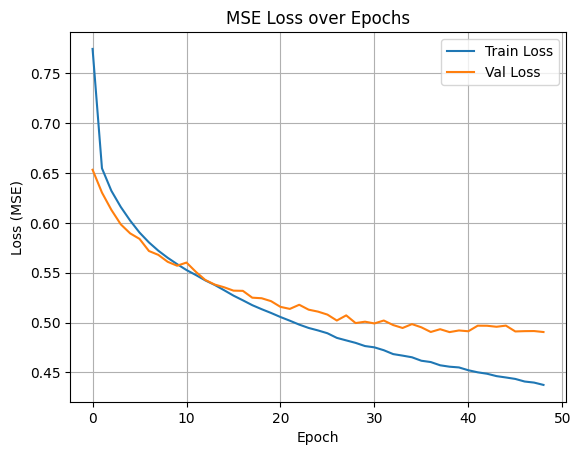

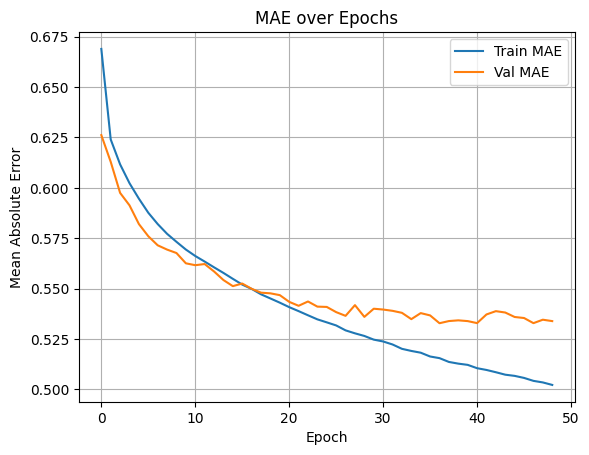

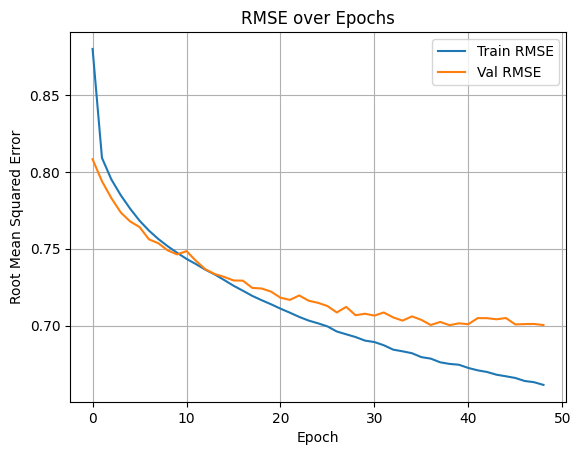

In [51]:
# 🎯 Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MSE Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# 🎯 Plot MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

# 🎯 Plot RMSE
plt.plot(history.history['rmse'], label='Train RMSE')
plt.plot(history.history['val_rmse'], label='Val RMSE')
plt.title("RMSE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()


In [52]:
test_loss, test_mae, test_rmse = RNCF_model.evaluate(
    [user_test, movie_test], y_test, verbose=0
)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Test MSE: 0.4909
Test MAE: 0.5353
Test RMSE: 0.7006


In [ ]:
import numpy as np

movie_idx_1 = movies_id_list.index(567)
movie_idx_2 = movies_id_list.index(580)
movie_idx_3 = movies_id_list.index(109)
movie_idx_4 = movies_id_list.index(197)
movie_idx_5 = movies_id_list.index(574)

movie_idx_6 = movies_id_list.index(467)  
movie_idx_7 = movies_id_list.index(393) 

user_idx_675 = users_id_list.index(675)
user_idx_841 = users_id_list.index(841)

user_input_675 = np.expand_dims(np.array(encoded_users[user_idx_675]), axis=0)

movie_input_1 = np.expand_dims(np.array(encoded_movies[movie_idx_1]), axis=0)
movie_input_2 = np.expand_dims(np.array(encoded_movies[movie_idx_2]), axis=0)
movie_input_3 = np.expand_dims(np.array(encoded_movies[movie_idx_3]), axis=0)
movie_input_4 = np.expand_dims(np.array(encoded_movies[movie_idx_4]), axis=0)
movie_input_5 = np.expand_dims(np.array(encoded_movies[movie_idx_5]), axis=0)


predicted_rating_1 = RNCF_model.predict([user_input_675, movie_input_1])
print(f"User 675 for Movie 567: prediction: {predicted_rating_1[0][0]:.3f}, real: 4.5")

predicted_rating_3 = RNCF_model.predict([user_input_675, movie_input_3])
print(f"User 675 for Movie 109: prediction: {predicted_rating_3[0][0]:.3f}, real: 1")

user_input_841 = np.expand_dims(np.array(encoded_users[user_idx_841]), axis=0)
movie_input_6 = np.expand_dims(np.array(encoded_movies[movie_idx_6]), axis=0)
movie_input_7 = np.expand_dims(np.array(encoded_movies[movie_idx_7]), axis=0)

predicted_rating_6 = RNCF_model.predict([user_input_841, movie_input_6])
print(f"User 841 for Movie 467: prediction: {predicted_rating_6[0][0]:.3f}, real: 5.0")

predicted_rating_7 = RNCF_model.predict([user_input_841, movie_input_7])
print(f"User 841 for Movie 393: prediction: {predicted_rating_7[0][0]:.3f}, real: 1.5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
User 675 for Movie 567: prediction: 4.488, real: 4.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
User 675 for Movie 109: prediction: 1.715, real: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
User 841 for Movie 467: prediction: 4.309, real: 5.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
User 841 for Movie 393: prediction: 1.769, real: 1.5


In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def build_user_latent_dict(users_id_list, encoded_users_array, user_nn_model):

    user_input_vectors = np.array(encoded_users_array)

    vu_matrix = user_nn_model.predict(user_input_vectors, batch_size=128)
    vu_matrix = tf.linalg.l2_normalize(vu_matrix, axis=1).numpy()
    
    vu_dict = {
        user_id: vu_vector for user_id, vu_vector in zip(users_id_list, vu_matrix)
    }
    return vu_dict

def get_similar_users(user_id, vu_dict, k=5):

    if user_id not in vu_dict:
        raise ValueError(f"User ID {user_id} not found in vu_dict.")

    target_vu = vu_dict[user_id].reshape(1, -1)
    
    all_ids = list(vu_dict.keys())
    all_vus = np.array([vu_dict[uid] for uid in all_ids])
    
    sims = cosine_similarity(target_vu, all_vus)[0]
    
    top_k_idx = np.argsort(sims)[::-1][1:k+1]
    
    return [(all_ids[i], sims[i]) for i in top_k_idx]

vu_dict = build_user_latent_dict(users_id_list, encoded_users, user_NN)

print("Recommended friends for user 675:")

friends = get_similar_users(675, vu_dict, k=30)
for fid, sim in friends:
    print(f"👤 User {fid} — similarity: {sim:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Recommended friends for user 675:
👤 User 773 — similarity: 0.9312
👤 User 673 — similarity: 0.9188
👤 User 13 — similarity: 0.9064
👤 User 139 — similarity: 0.9059
👤 User 409 — similarity: 0.8940
👤 User 494 — similarity: 0.8723
👤 User 150 — similarity: 0.8680
👤 User 335 — similarity: 0.8641
👤 User 483 — similarity: 0.8632
👤 User 683 — similarity: 0.8623
👤 User 484 — similarity: 0.8546
👤 User 684 — similarity: 0.8532
👤 User 641 — similarity: 0.8365
👤 User 143 — similarity: 0.8311
👤 User 619 — similarity: 0.8308
👤 User 841 — similarity: 0.8256
👤 User 187 — similarity: 0.8249
👤 User 643 — similarity: 0.8247
👤 User 570 — similarity: 0.8211
👤 User 634 — similarity: 0.8190
👤 User 445 — similarity: 0.8182
👤 User 87 — similarity: 0.8180
👤 User 461 — similarity: 0.8156
👤 User 25 — similarity: 0.8147
👤 User 753 — similarity: 0.8137
👤 User 471 — similarity: 0.8125
👤 User 324 — similarity: 0.8112
👤 User 594 — similarity: 0.8112
👤 User 800 — similarity: 0.8104
👤 U